In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten


# Load Dataset

In [2]:
X_train = np.loadtxt("input.csv", delimiter=',')
Y_train = np.loadtxt("labels.csv", delimiter=',')

X_test = np.loadtxt("input_test.csv", delimiter=',')
Y_test = np.loadtxt("labels_test.csv", delimiter=',')

X_train=X_train.reshape((len(X_train), 100, 100, 3))
Y_train=Y_train.reshape((len(Y_train), 1))

X_test=X_test.reshape((len(X_test), 100, 100, 3))
Y_test=Y_test.reshape((len(Y_test), 1))

X_train=X_train/255
X_test=X_test/255

In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


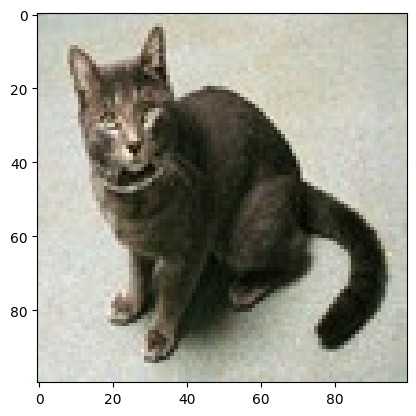

In [4]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [5]:
model = Sequential([
    # Your Code starts here #
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    # Your Code ends here #
])

c:\Users\Aakriti Chandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add( Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))





model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit( X_train, Y_train, epochs=20, batch_size=64 )

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8582 - loss: 0.3223
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8703 - loss: 0.3085
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9013 - loss: 0.2543
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8999 - loss: 0.2413
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9327 - loss: 0.1977
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9556 - loss: 0.1598
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9584 - loss: 0.1382
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9453 - loss: 0.1546
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9789 - loss: 0.0960
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9828 - loss: 0.0818
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9838 - loss: 0.0718
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy:

# Evaluate performance on Test Dataset

In [12]:
model.evaluate(X_test, Y_test )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6703 - loss: 1.6527


[1.4800471067428589, 0.6775000095367432]

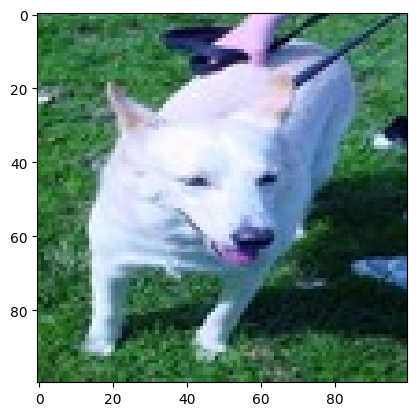

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
our model says its a  dog


In [13]:
idxi=random.randint(0, len(Y_test))
plt.imshow(X_test[idxi,:])
plt.show()

y_pred=model.predict(X_test[idxi,:].reshape(1,100,100,3))
pred= 'cat' if y_pred > 0.5 else 'dog'
print("our model says its a ", pred)